In [180]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json
import ast

In [181]:
# read files
#person_id,id,name,character,role
df_credits = pd.read_csv('data/credits.csv')
#id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
df_netflix = pd.read_csv('data/titles.csv')
print(len(df_netflix))
df_netflix = df_netflix[(df_netflix['imdb_score'].notna() | df_netflix['tmdb_score'].notna())]
print(len(df_netflix))

5850
5762


Number of netflix movies/series: 5762
Number of shows: 2069
Number of movies: 3693
Number of years: 62
Number of genres: 19
Number of age certifications: 12
Number of production countries: 108


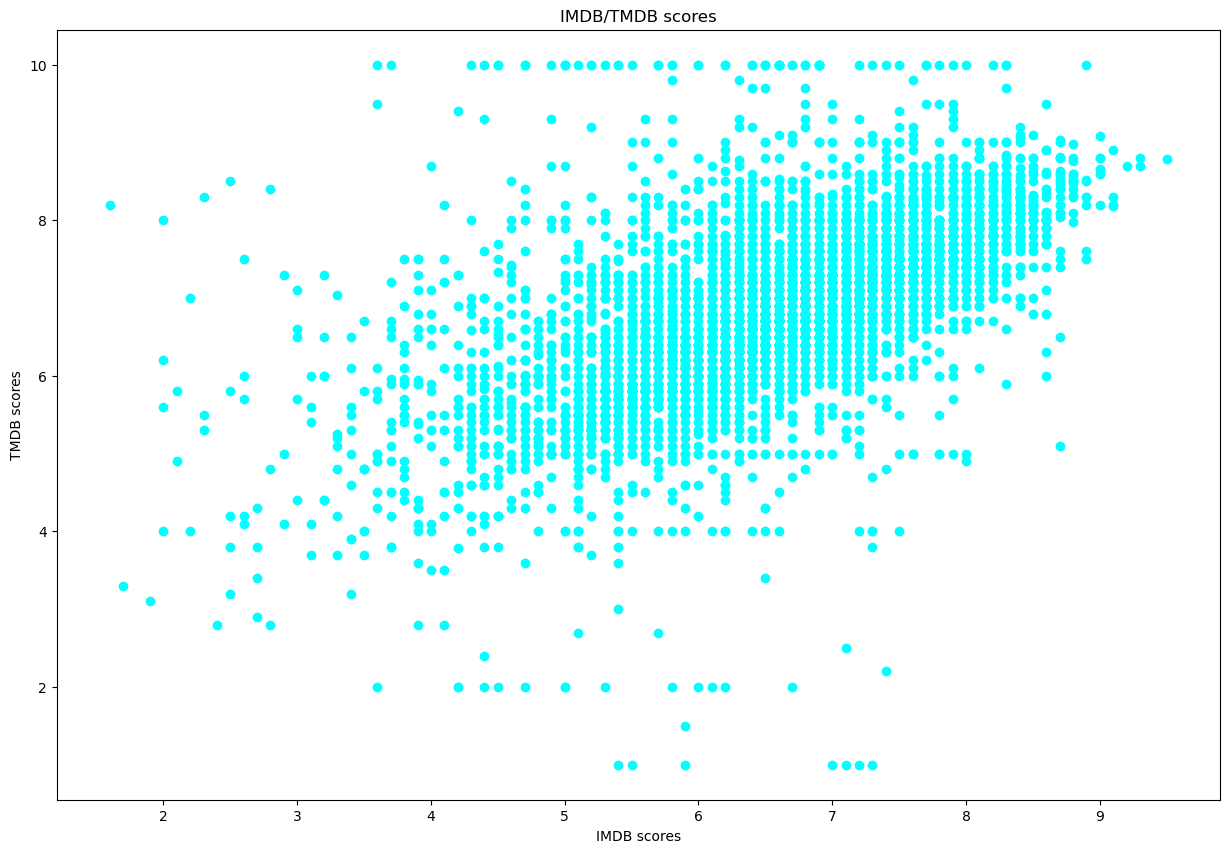

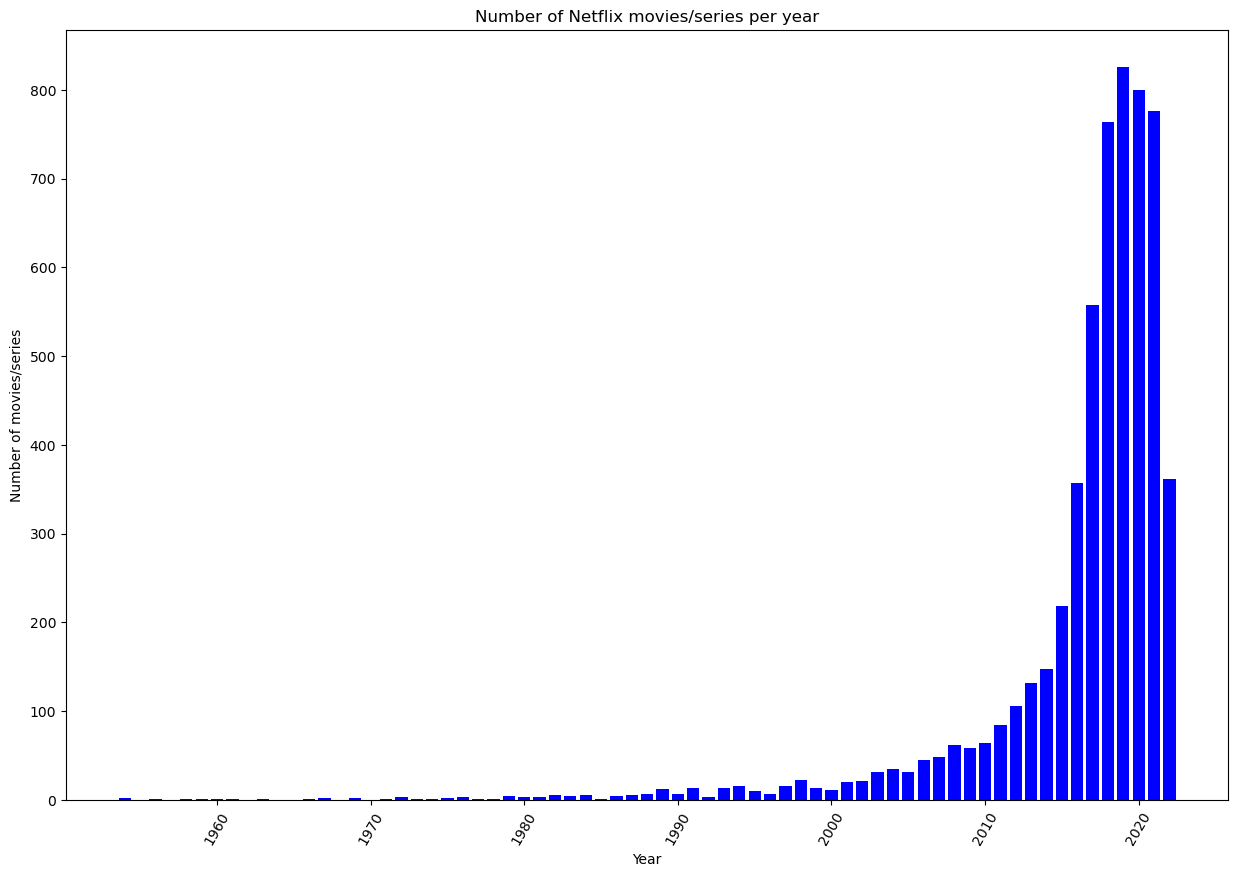

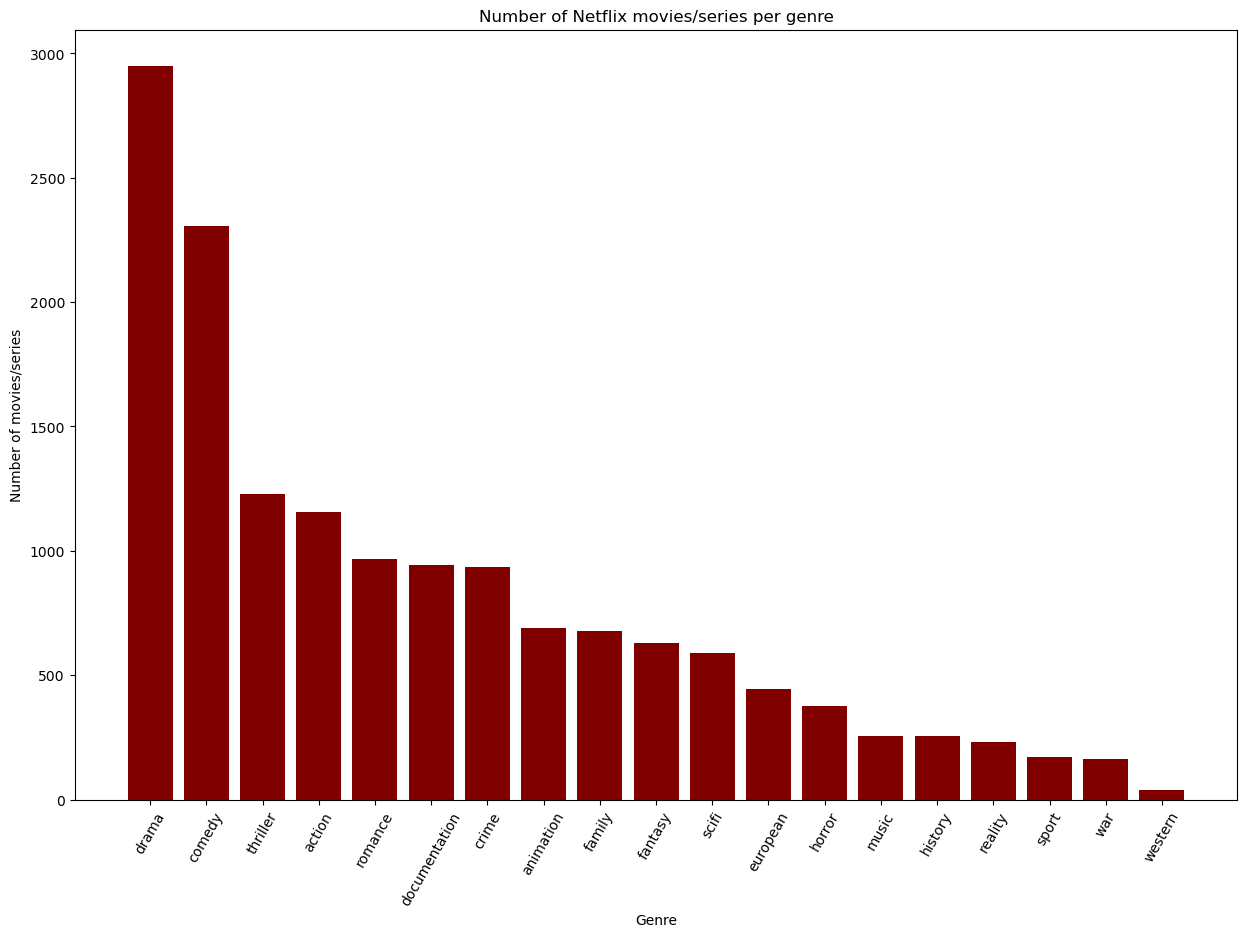

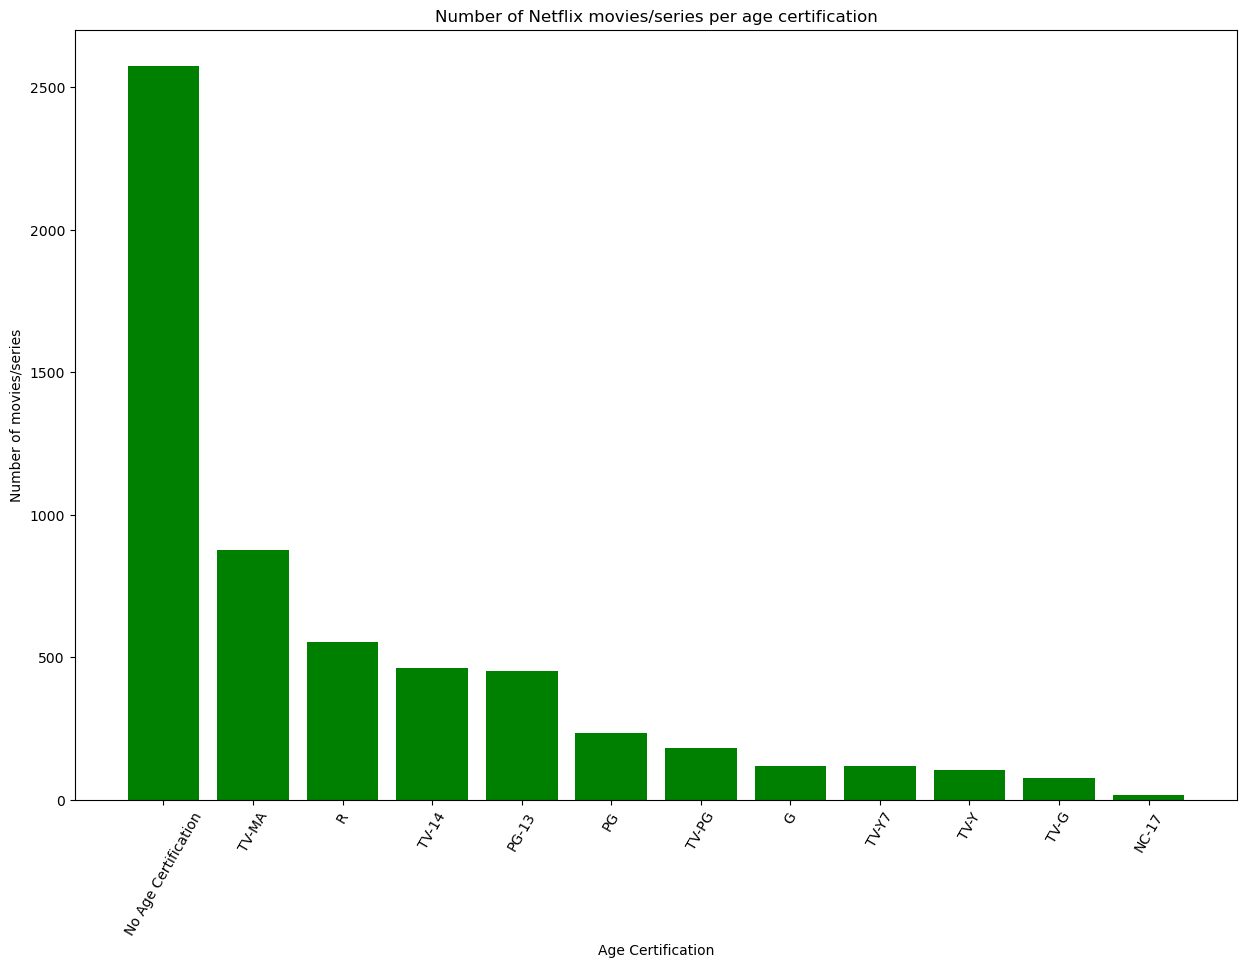

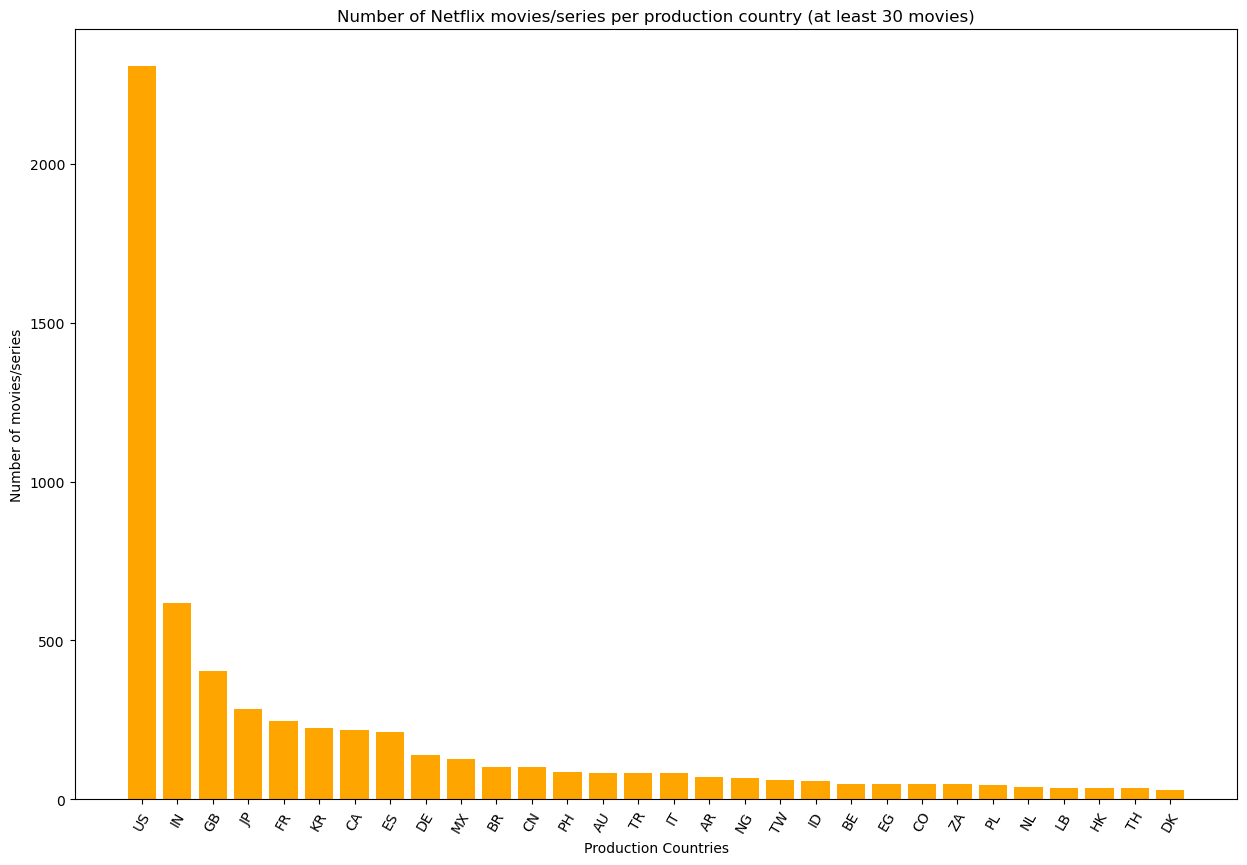

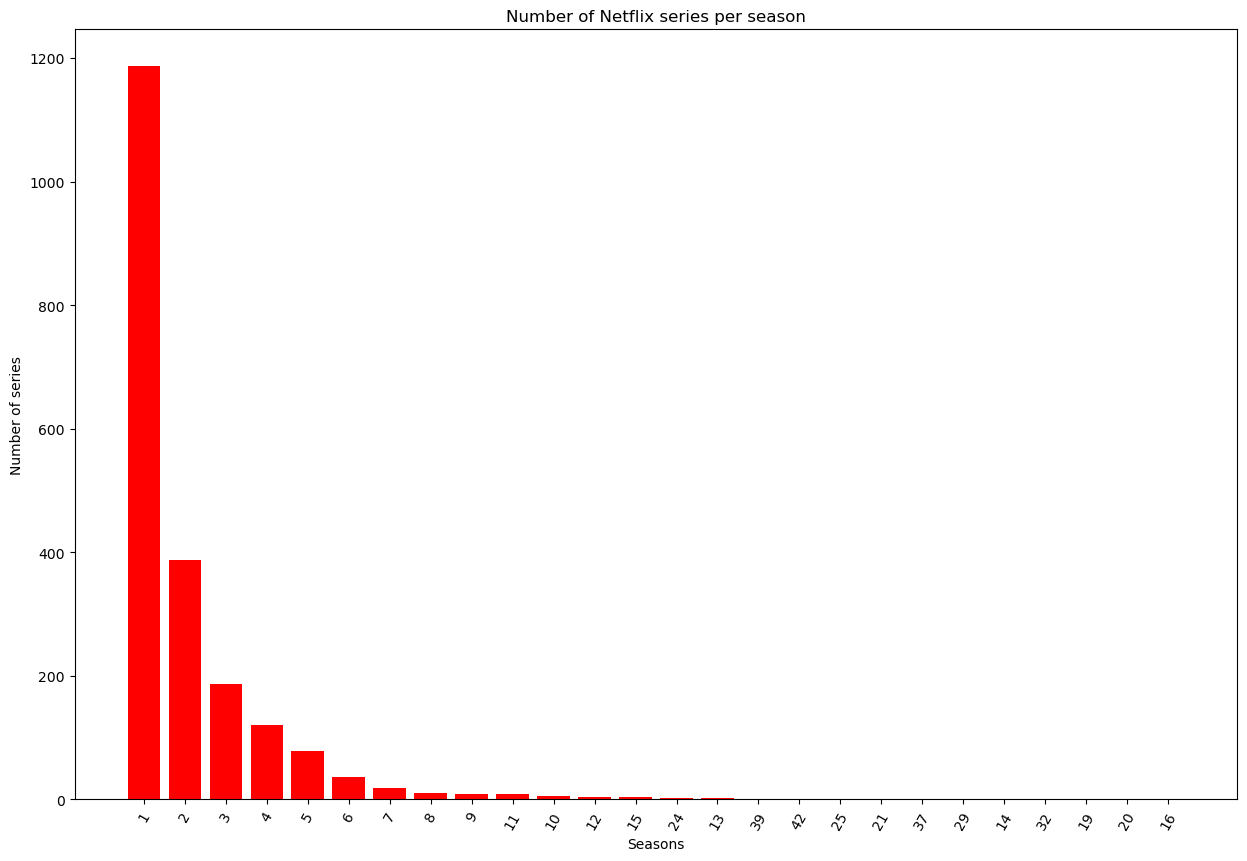

In [182]:
# basic statistics (for milestone 1)
def sort_json(data):
    return {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

def plot_quantities(data, color, xlabel, ylabel, title, filename):
    x = list(data.keys())
    y = list(data.values())

    plt.figure(figsize=(15, 10))
    plt.bar(x, y, color=color, width=0.8)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xticks(rotation=60)
    plt.title(title)
    
    plt.savefig(f'figures/{filename}.png', bbox_inches='tight')

# number of movies/series
list_movie_ids = df_netflix['id'].unique().tolist()
print('Number of netflix movies/series:', len(list_movie_ids))
print('Number of shows:', len(df_netflix[(df_netflix['type'] == 'SHOW')]))
print('Number of movies:', len(df_netflix[(df_netflix['type'] == 'MOVIE')]))

# years
df_years = df_netflix['release_year']
years = {}
for year in df_years:
    if year in years:
        years[year] += 1
    else:
        years[year] = 1
years = sort_json(years)
print('Number of years:', len(years.keys()))

# genre
df_genres = df_netflix['genres']
genres = {}
for row in df_genres:
    genres_movie = ast.literal_eval(row) 
    for genre in genres_movie:
        if genre in genres:
            genres[genre] += 1
        else:
            genres[genre] = 1
genres = sort_json(genres)
print('Number of genres:', len(genres.keys()))

# age certification
df_age_certification = df_netflix['age_certification']
age_certifications = {}
for cert in df_age_certification:
    cert = str(cert) 
    cert = cert if cert != 'nan' else 'No Age Certification'
    
    if cert in age_certifications:
        age_certifications[cert] += 1
    else:
        age_certifications[cert] = 1
age_certifications = sort_json(age_certifications)
print('Number of age certifications:', len(age_certifications.keys()))

# production countries
df_production_countries = df_netflix['production_countries']
production_countries = {}
for row in df_production_countries:
    countries = ast.literal_eval(row) 
    #json.loads(row)
    for country in countries:
        if country in production_countries:
            production_countries[country] += 1
        else:
            production_countries[country] = 1
production_countries = sort_json(production_countries)
print('Number of production countries:', len(production_countries.keys()))
n_min = 30
production_countries = {k: v for k, v in production_countries.items() if v >= n_min}

# seasons for series
filter_series = df_netflix['type'] == 'SHOW'
df_seasons = df_netflix[filter_series]['seasons']
seasons = {}
for row in df_seasons:
    season = str(int(row))
    if season in seasons:
        seasons[season] += 1
    else:
        seasons[season] = 1
seasons = sort_json(seasons)


# imdb score
df_imdb_scores = df_netflix['imdb_score']
imdb_scores = []
for row in df_imdb_scores:
    imdb_scores.append(row)
df_tmdb_scores = df_netflix['tmdb_score']
tmdb_scores = []
for row in df_tmdb_scores:
    tmdb_scores.append(row)

plt.figure(figsize=(15, 10))
plt.scatter(imdb_scores, tmdb_scores, color='cyan')

plt.xlabel('IMDB scores')
plt.ylabel('TMDB scores')

plt.title('IMDB/TMDB scores')

plt.show()

plot_quantities(years, 'blue', 'Year', 'Number of movies/series', 'Number of Netflix movies/series per year', 'n_ms_per_year')
plot_quantities(genres, 'maroon', 'Genre', 'Number of movies/series', 'Number of Netflix movies/series per genre', 'n_ms_per_genre')
plot_quantities(age_certifications, 'green', 'Age Certification', 'Number of movies/series', 'Number of Netflix movies/series per age certification', 'n_ms_per_age_cert')
plot_quantities(production_countries, 'orange', 'Production Countries', 'Number of movies/series', f'Number of Netflix movies/series per production country (at least {n_min} movies)', 'n_ms_per_country')
plot_quantities(seasons, 'red', 'Seasons', 'Number of series', 'Number of Netflix series per season', 'n_ms_per_season')

In [183]:
# number of actors
print('Number of actors:', len(df_credits[df_credits['role'] == 'ACTOR']['person_id'].unique()))
# number of directors
print('Number of directors:', len(df_credits[df_credits['role'] == 'DIRECTOR']['person_id'].unique()))

Number of actors: 51544
Number of directors: 3457


In [184]:
def plot_quantities_log(data, color, xlabel, ylabel, title, filename):
    x = list(data.keys())
    y = list(data.values())

    plt.figure(figsize=(15, 10))
    plt.bar(x, y, color=color, width=0.8)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.xticks(rotation=60)
    plt.title(title)

    plt.yscale('log')
    plt.gca().xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True)) # to set integers for the xaxis

    plt.savefig(f'figures/{filename}.png', bbox_inches='tight')
    #plt.show()

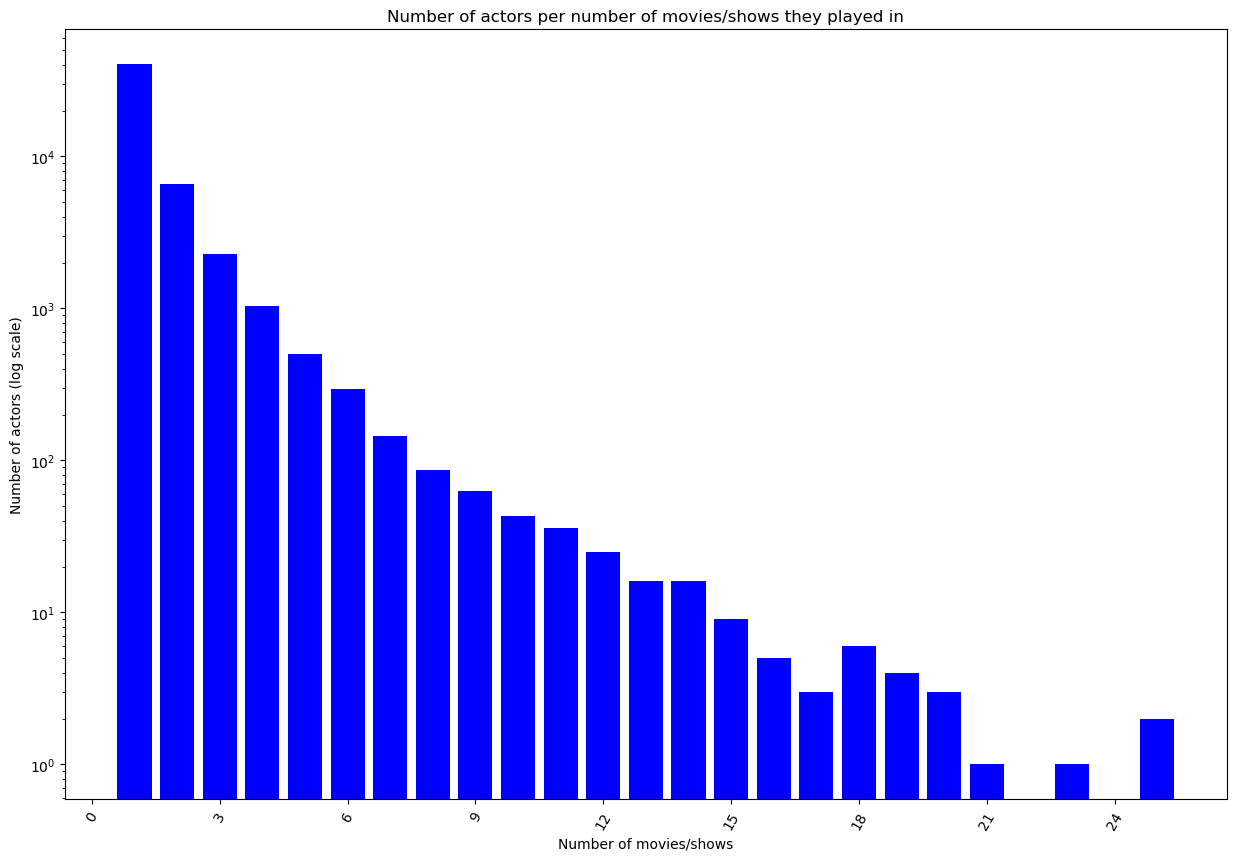

In [187]:
from collections import Counter
import matplotlib

# Number of actors per number of movies/shows they played in
filter_actors = df_credits['role'] == 'ACTOR'
number_movies_shows_by_actor_id = {}
df_actors_id = df_credits[filter_actors]['person_id']

for id in df_actors_id:
    if id in number_movies_shows_by_actor_id:
        number_movies_shows_by_actor_id[id] += 1
    else:
        number_movies_shows_by_actor_id[id] = 1

number_actors_per_number_movies_shows = Counter(number_movies_shows_by_actor_id.values())


plot_quantities_log(number_actors_per_number_movies_shows, 'blue', 'Number of movies/shows', 'Number of actors (log scale)', 'Number of actors per number of movies/shows they played in', 'n_actors_per_ms')



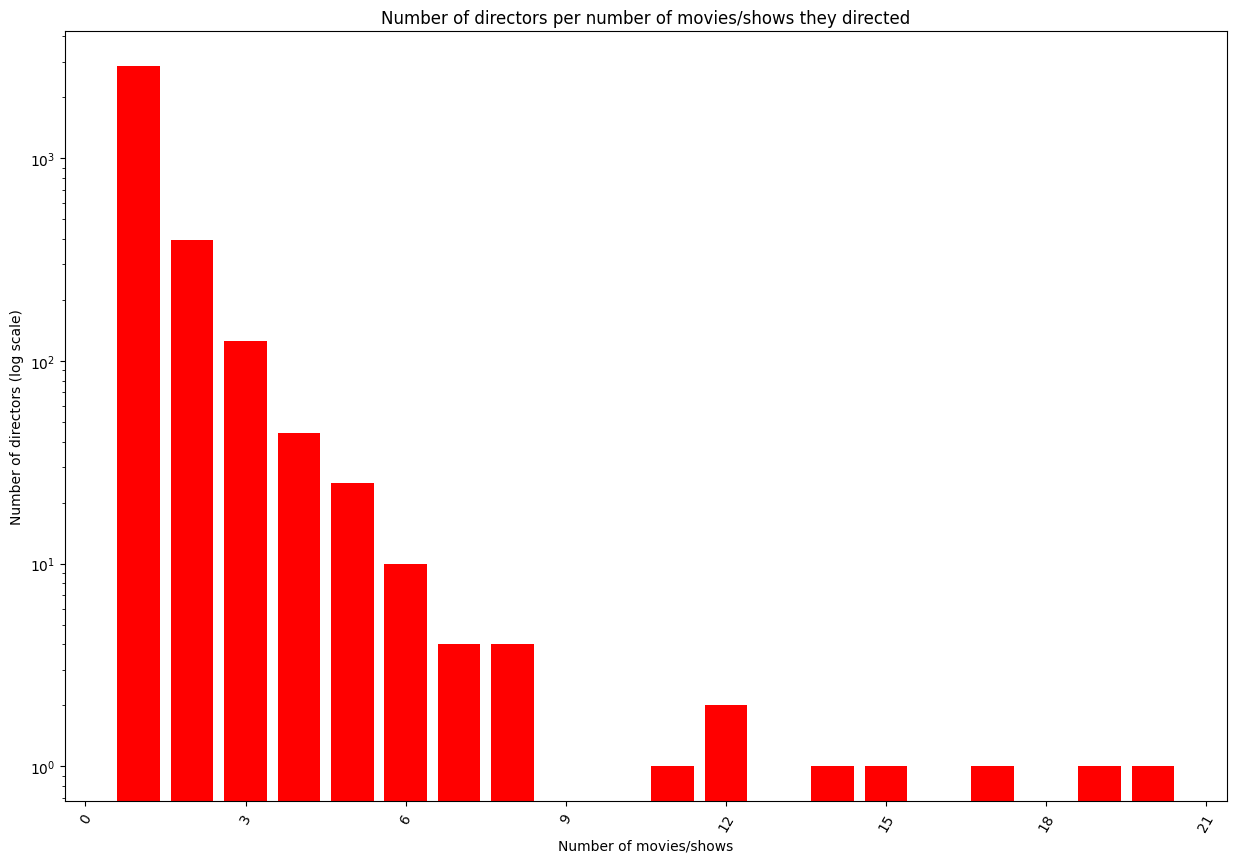

In [30]:
# Number of directors per number of movies/shows they directed
filter_directors = df_credits['role'] == 'DIRECTOR'
number_movies_shows_by_dir_id = {}
df_dir_id = df_credits[filter_directors]['person_id']

for id in df_dir_id:
    if id in number_movies_shows_by_dir_id:
        number_movies_shows_by_dir_id[id] += 1
    else:
        number_movies_shows_by_dir_id[id] = 1

number_dir_per_number_movies_shows = Counter(number_movies_shows_by_dir_id.values())

plot_quantities_log(number_dir_per_number_movies_shows, 'red', 'Number of movies/shows', 'Number of directors (log scale)', 'Number of directors per number of movies/shows they directed', 'n_directors_per_ms')

In [ ]:
df=pd.merge(df_netflix, df_credits, on='id', how='inner')
df=df.dropna(subset='imdb_score')

In [ ]:
df1=df[df['role']=='ACTOR']
temp=df1['name'].value_counts()
number_counts = temp.value_counts()

# Sort the index to have a sorted bar plot (optional)
number_counts = number_counts.sort_index()

# Plotting
number_counts.plot(kind='bar',log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of Actors')
plt.title('Number of Actors for the number of movies')
plt.savefig('1.png')
plt.show()



In [ ]:
df2=df[df['role']=='DIRECTOR']
temp=df2['name'].value_counts()
number_counts = temp.value_counts()

# Sort the index to have a sorted bar plot (optional)
number_counts = number_counts.sort_index()

# Plotting
number_counts.plot(kind='bar',log=True)
plt.xlabel('Number of movies')
plt.ylabel('Number of Directors')
plt.title('Number of Directors for the number of movies')
plt.savefig('2.png')
plt.show()

In [ ]:
df3=df1.groupby(by='name')['imdb_score'].mean()

temp=df3.value_counts()
number_counts = temp.sort_index()
number_counts

number_counts.plot()
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Actors')
plt.title('Number of Actors for the IMDB rating')
plt.savefig('3.png')
plt.show()



In [ ]:
df4=df2.groupby(by='name')['imdb_score'].mean()

temp=df4.value_counts()
number_counts = temp.sort_index()
number_counts

number_counts.plot()
plt.xlabel('IMDB Rating')
plt.ylabel('Number of Directors')
plt.title('Number of Directors for the IMDB Rating')
plt.savefig('4.png')
plt.show()